# What we want

Using the graph poset from $f\in\tilde{P}_{n}$ we want the family of upper sets to get all extensions of $f$.

## To investigate: Sage notation

### Digraph

In [44]:
D = DiGraph({0:[1, 2, 3], 4:[2, 5], 1:[8], 2:[7], 3:[7], 5:[6,7], 7:[8], 6:[9], 8:[10], 9:[10]})
# # D.plot(layout='circular').show()
# D.add_edge(7, 4)
# D.is_directed_acyclic()
# D.vertices()
P=Poset(D)

### Upper covers multiple elements

In [46]:
P = Poset([[1,5], [2,6], [3], [4], [], [6,3], [4]])
P.upper_covers([1,2]) #Fails for multple elements.

TypeError: unhashable type: 'list'

### Hasse diagram

In [19]:
# #Given poset returns directed graph.

# P = posets.DivisorLattice(12)
# plot(P)
H = P.hasse_diagram(); H
# plot(H)
# # # Digraph on 6 vertices
# P.cover_relations()
# # [[1, 2], [1, 3], [2, 4], [2, 6], [3, 6], [4, 12], [6, 12]]
# # H.edges(labels=False)
# # [(1, 2), (1, 3), (2, 4), (2, 6), (3, 6), (4, 12), (6, 12)]

[[1, 2], [1, 3], [2, 4], [2, 6], [3, 6], [4, 12], [6, 12]]

### Loops

In [69]:
D = DiGraph(4, loops=True)
D.add_edges([(0, 0), (2, 2), (3, 3), (2, 3)])
D.number_of_loops()
# D.edges(labels=False)
# plot(D)
# # [(0, 0), (1, 1), (2, 2), (2, 3), (3, 3)] #Self connecting loops
# D.has_loops()
# D.remove_loops()
# D.number_of_loops()
# D.has_loops()
# plot(D)
# D.edges(labels=False)
# # [(2, 3)]
# sage: D.allows_loops()
# # True
# sage: D.has_loops()
# # False

0

### Multiple edges

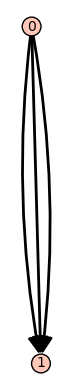

In [9]:
D = DiGraph(multiedges=True, sparse=True); D
# plot(D)
# Multi-digraph on 0 vertices
# D.has_multiple_edges()
# False
# D.allows_multiple_edges()
# # True
D.add_edges([(0, 1)] * 3)
# plot(D)
# D.has_multiple_edges()
# # True
# D.multiple_edges()
# [(0, 1, None), (0, 1, None), (0, 1, None)]
# D.allow_multiple_edges(False); D
# Digraph on 2 vertices
# D.has_multiple_edges()
# # False
# D.edges()
# [(0, 1, None)]

### Investigating failed states: Cycles!

In [37]:
import numpy as np
import pickle
from sage.graphs.graph_input import from_dict_of_lists

'''

From the first 100 items in funct_graph_lst we have the following failed states:

[51, 54, 58, 62, 63, 66, 72, 73, 75, 98, 99]

'''

#Get funct_graph_lst

name="for_P6" #! CHANGE ME

path=f"ins/{name}"
pickle_in = open(path, "rb")
p_in = pickle.load(pickle_in)
pickle_in.close()
funct_graph_lst=p_in

G=funct_graph_lst[51] 

# Can form a poset:

# try:
#     P=Poset(G) #Fails: # Check that the digraph does not contain loops, multiple edges
# except ValueError:
    

# try:
#     H=P.hasse_diagram()
#     H.is_directed_acyclic()

# except ValueError:
    
    
g = DiGraph(loops=True)
from_dict_of_lists(g, G,loops=True, multiedges=True)
# # g.allows_loops() #True
# g.allows_multiple_edges() #True

# #Questions:

#Loops
# g.has_loops() #51: False
# g.number_of_loops()# 0
# g.has_multiple_edges() # false

# g.is_directed_acyclic()
g.is_directed_acyclic(certificate=True) #When certificate=True: If the graph is acyclic, returns a pair (True, ordering) where ordering is a list of the vertices such that u appears before v in ordering if u, v is an edge.Else, returns a pair (False, cycle) where cycle is a list of vertices representing a circuit in the graph.

#51: (False, [(1, 2, 3, 5), (2,), (2, 3, 4, 5), (3,)])

#What does this mean for this function: Is it MSA? how do we get this function

#Why can't we form a poset with a cycle?

# if we have a cycle can just take vertexs?

# P=Poset(g)




(False, [(1, 2, 3, 5), (2,), (2, 3, 4, 5), (3,)])

### Get $P_{n+1}$ 

In [1]:
import numpy as np
import pickle
from sage.graphs.graph_input import from_dict_of_lists


#Get funct_graph_lst

name="for_P6" #! CHANGE ME

path=f"ins/{name}"
pickle_in = open(path, "rb")
p_in = pickle.load(pickle_in)
pickle_in.close()
funct_graph_lst=p_in[:100] #CHANGE ME


#information:
    # Return all order filters generated by the elements of an iterable elements.
    # I is an order filter if, for any x in I and y such that y≥x, then y is in I. This is also called upper set or upset.
    #the format we have fun_g is {(1,): [(1, 2)], (2,): [(1, 2)], (1, 2): []}

Up_lst=[]
fail_lst_indexs=[]
for fun_g in funct_graph_lst: #For P6 do in parts.

    G=fun_g
    g = DiGraph(loops=True)
    from_dict_of_lists(g, G)
    
#     P=Poset(g)

    try:
        P=Poset(fun_g)
    
    except ValueError:
        print(f"Function {funct_graph_lst.index(fun_g)} fails as: Check that the digraph does not contain loops, multiple edges")
        fail_lst_indexs.append(funct_graph_lst.index(fun_g))
#         continue

    A=P.directed_subsets('up') # If direction is ‘up’, returns the order filters (upper sets).
        
    Up_lst.append(list(A))
          
counter=0
for i in Up_lst: #
    counter+=len(list(i))
print(f"\n The total number of lists of extensions is: {counter}")
print("\n",fail_lst_indexs, f"Of length: {len(fail_lst_indexs)}")

Function 51 fails as: Check that the digraph does not contain loops, multiple edges
Function 54 fails as: Check that the digraph does not contain loops, multiple edges
Function 58 fails as: Check that the digraph does not contain loops, multiple edges
Function 62 fails as: Check that the digraph does not contain loops, multiple edges
Function 63 fails as: Check that the digraph does not contain loops, multiple edges
Function 66 fails as: Check that the digraph does not contain loops, multiple edges
Function 72 fails as: Check that the digraph does not contain loops, multiple edges
Function 73 fails as: Check that the digraph does not contain loops, multiple edges
Function 75 fails as: Check that the digraph does not contain loops, multiple edges
Function 98 fails as: Check that the digraph does not contain loops, multiple edges
Function 99 fails as: Check that the digraph does not contain loops, multiple edges

 The total number of lists of extensions is: 95978

 [51, 54, 58, 62, 63, 6

[[], [(3,), (2, 3), (1, 3), (1, 2, 3)], [(3,), (2,), (2, 3), (1, 2), (1, 3), (1, 2, 3)], [(3,), (2,), (2, 3), (1,), (1, 2), (1, 3), (1, 2, 3)], [(3,), (2, 3), (1,), (1, 2), (1, 3), (1, 2, 3)], [(3,), (2, 3), (1, 2), (1, 3), (1, 2, 3)], [(2,), (2, 3), (1, 2), (1, 2, 3)], [(2,), (2, 3), (1,), (1, 2), (1, 3), (1, 2, 3)], [(2,), (2, 3), (1, 2), (1, 3), (1, 2, 3)], [(2, 3), (1, 2, 3)], [(2, 3), (1,), (1, 2), (1, 3), (1, 2, 3)], [(2, 3), (1, 2), (1, 2, 3)], [(2, 3), (1, 2), (1, 3), (1, 2, 3)], [(2, 3), (1, 3), (1, 2, 3)], [(1,), (1, 2), (1, 3), (1, 2, 3)], [(1, 2), (1, 2, 3)], [(1, 2), (1, 3), (1, 2, 3)], [(1, 3), (1, 2, 3)], [(1, 2, 3)]] 

[[], [(2, 3), (1, 2, 3), (2,), (1, 2), (3,), (1, 3)], [(2, 3), (1,), (1, 2, 3), (2,), (1, 2), (3,), (1, 3)], [(1,), (1, 2, 3), (2,), (1, 2), (3,), (1, 3)], [(1, 2, 3), (2,), (1, 2), (3,), (1, 3)], [(2,), (1, 2)], [(2,), (1, 2), (3,), (1, 3)], [(2,), (1, 2), (1, 3)], [(1, 2)], [(1, 2), (3,), (1, 3)], [(1, 2), (1, 3)], [(3,), (1, 3)], [(1, 3)]] 

[[], [(2, 

In [20]:
import csv

with open('cvs_P6_1.csv', 'w') as f: #! CHANGE ME
    # using csv.writer method from CSV package
    write = csv.writer(f)
    write.writerows(Up_lst)
